# PISA 2012 dataset Analysis
## by Youssef Abdelkader

## Investigation Overview

In a meritocratic age of education, you, as a human, are evaluated by your grades and educational achievements. Maybe because educational achievement is the middle playground of rich and poor, but is it really? There is no need to discuss or question one's arguments and ideologies when you have got their educational profile at your hands. If one has been to a prestigious universty or has been getting high grades, then for sure one is always right. Educational meritocracy must be a better evaluational system than gerontocracy, in which old always knows better, but is it really? It is the field of men as women shall only care for the children and generate more bright men fit for studying the sciences, but is it really? 

For it is or not, we shall know in this presentation.

## Dataset Overview

PISA stands for Programme for International Student Assessment which is a study aimed at assessing the scholar performance and educational level in various countries through student questionares and measuring the performance of 15-year-old students on various subjects.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df_pisa = pd.read_csv('D:/JupyterNotebooks/third_project/pisa2012.csv', encoding='latin-1')

In [9]:
df_pisa2 = pd.DataFrame()
# Loading my features of interest into a separate dataframe
df_pisa2[['cntry', 'gender', 'age', 'grade', 'wealth']]=df_pisa[['CNT', 'ST04Q01', 'AGE','GRADE', 'WEALTH']]

In [10]:
base_color = sb.color_palette()[0]

In [11]:
#creating a dataframe that holds every wealth index range against the relative frequency of every grade index
indeces = ['3.3 > wealth >= 2.3', '2.3 > wealth >= 1.3', '1.3 > wealth >= 0.3', '0.3 > wealth >= -0.7', '-0.7 > wealth >= -1.7','-1.7 > wealth']
columns = ['-3', '-2', '-1', '0', '1', '2', '3']
wealth_grade = pd.DataFrame(index = indeces, columns = columns)
arr = [3.3, 2.3, 1.3, 0.3, -0.7, -1.7, -6.7] #an array to use in setting wealth limits 
i = 0 #the index that will help navigate the above array
for row in wealth_grade.index:
    for col in wealth_grade.columns:
        col2 = int(col)
        #assigning the relative frequency of students of a specific grade and wealth index to the appropriate cell:
        wealth_grade.loc[[row], [col]] = df_pisa2.query('@arr[@i] >wealth>= @arr[@i+1] and grade == @col2').shape[0]/df_pisa2.query('@arr[@i] >wealth>= @arr[@i+1]').shape[0]
    i+=1
wealth_grade = wealth_grade.drop(columns = ['0']) #dropping the 0 grade index bar because it is distracting

In [12]:
df_ages = df_pisa2.copy()
df_ages = df_ages.age.dropna()

#preparing the dataframe of age versus grade index counts
age_grade = df_pisa2.groupby(['age','grade']).size()
age_grade = age_grade.reset_index(name = 'num')
age_grade = age_grade.pivot(index = 'age', columns = 'grade', values = 'num')
age_grade = age_grade.fillna(0)

#calculating relative frequancy:
#creating a sum column that holds the total of all other columns
age_grade['sum'] = age_grade[-3.0]+age_grade[-2.0]+age_grade[-1.0]+age_grade[0.0]+age_grade[1.0]+age_grade[2.0]+age_grade[3.0]
for col in age_grade[0:6]:
    age_grade[col] = age_grade[col]/age_grade['sum'] #changing the counts into relative frequencies
#removing grade indeces of values smaller then -1 and greater than 1 because their colors are so faded
age_grade = age_grade.drop(columns=['sum', -2.0, -3.0, 2.0, 3.0]) 
age_grade = age_grade.drop(labels = [15.17], axis = 0) #deleting this row because it only represents a single person
age_grade = age_grade.iloc[::-1] # reversing the indeces to have them from lower to higher when plotted

In [13]:
#preparing a dataframe to hold the country versus its corresponding grade index means of male and female genders
cntry_vcount = df_pisa2['cntry'].value_counts()
indeces = np.array(cntry_vcount.index)
columns = ['Male', 'Female']
data_cntry = pd.DataFrame(index = indeces, columns = columns)
for col in data_cntry.columns:
    for row in data_cntry.index:
        #assigning grade mean of students grouped by a certain country and gender to the appropriate cell
        data_cntry.loc[[row], [col]] = df_pisa2.query('cntry == @row and gender==@col').grade.mean()
data_cntry['cntry'] = data_cntry.index

## wealth against grade index

Here, we notice that as grade increases, the median wealth index increases. However, the box plot of grade index "3" breaks the pattern where the wealth median decreases significantly that even the upper quartile is lower than all of the medians of the other box plots. In the box plot of grade index "3", there is nearly no students of wealth indeces higher than "2". All of this suggests that wealth of a student's family influences his educational performance. 

To conclude, apparently the wealth median increases with grade, but the wealth median increases more slowly as the grade index increases. My hypothesis is that climbing the grade index ladder is easier for the financially priviledged. however, as family wealth increases, the student becomes less and less motivated to achieve higher and higher grades.

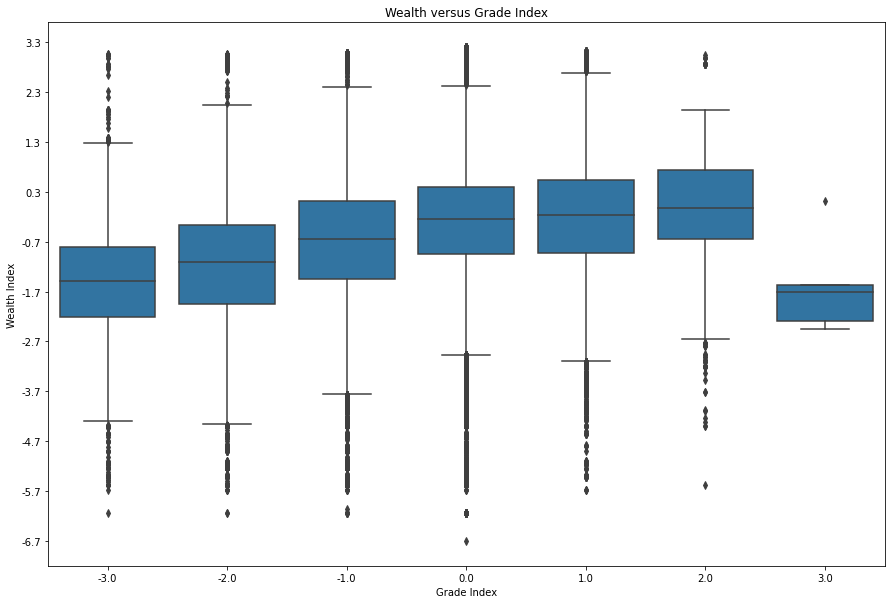

In [49]:
#plotting wealth against grade index
plt.figure(figsize=(15, 10))
bin_wealth = np.arange(-6.65, 3.25+1, 1)
bin_wealthN = ['{:0.1f}'.format(v) for v in bin_wealth]
g = sb.boxplot(data = df_pisa2, x = 'grade', y ='wealth', color = base_color )
plt.title("Wealth versus Grade Index")
plt.xlabel("Grade Index")
plt.ylabel("Wealth Index")
g.set_yticks(bin_wealth);
g.set_yticklabels(bin_wealthN);

## wealth index range against the relative frequency of every grade index

This is a supplementary diagram for the last box plot. I frurther investigated the relation between grade and wealth and plotted the relative frequencies of grade indeces above and below the modal grade against certain wealth index ranges. I found out that as the wealth index decreases, the relative frequency of a negative grade index increases. In addition, the relative frequency of a positive grade index increases as wealth increases. However, the relative frequency of a grade index of "2" increases as wealth decreases until a certain wealth index range (1.3 > wealth >=0.3) and then starts declining again.

All this can tell us is that family wealth status influences one's grades and educational performance. Therefore, even educational achievement is not fully separable from family wealth; it is not always a fair play.

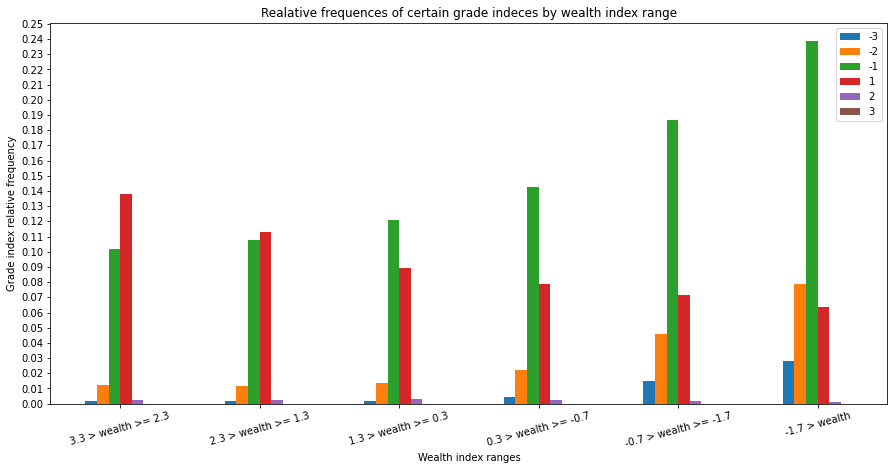

In [50]:
#plotting wealth index ranges against the relative frequencies of every grade index
bins_grade = np.arange(0, 0.25+0.01, 0.01)
bins_grade_n = ['{:0.2f}'.format(v) for v in bins_grade]
g  = wealth_grade.plot(kind = 'bar', figsize = (15, 7))
plt.title('Realative frequences of certain grade indeces by wealth index range')
plt.xlabel('Wealth index ranges')
plt.ylabel('Grade index relative frequency')
plt.yticks(bins_grade, bins_grade_n)
plt.xticks(rotation = 15);

## Age versus the relative frequency of grade indeces

Genereally, We can notice that the relative frequency of students having a positive grade index decreases as the group age decreases. Also, the relative frequency of a negative grade index icreases as the age decreases.

Therefore, to some extent, age has its own doing in our educational performance. If you entered school a month older, chances are you did slightly better than your average classmate because of being a month older. It seems that cognitive development matters even on the narrow scale of a few months. Educational achievement is not a better measurement of one's overall intelligence than age is. To say that someone's ideologies and opinions are more viable because of their educational achievment is just about similar to the saying: old always knows better.

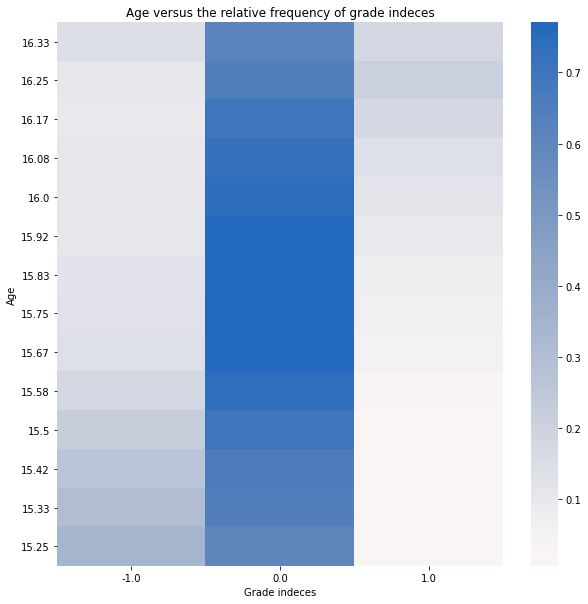

In [63]:
#plotting a heatmap of age versus the corresponding relative frequency of grade indeces
plt.figure(figsize=[10, 10])

g = sb.heatmap(age_grade, cmap='vlag_r', center = 0);
g.set_yticklabels(g.get_yticklabels(), rotation = 0);

plt.title("Age versus the relative frequency of grade indeces");
plt.xlabel("Grade indeces");
plt.ylabel("Age");

## Female versus male mean grade index by country

Here, we can notice that females generally have a higher grade index mean than males do in nearly all of the countries listed. Females seem to do better in maths and sciences than men do which opposes the populist belief that women are cognitively inferior to men and should only care for the children and household matters because it is more "effiicient" that way. Male, female, or whatever your gender statistics do not determine your societal role. I am just assuring those holding these populist opinions of male academic superiority that statistics actually have a different say in the matter: on average, females seem to outperform males in sciences and maths.

Furthermore, we can deduce that there are more countries/states with negative grade index means than there are with positive grade index means. Brazil has the smallest grade index mean of all countries.

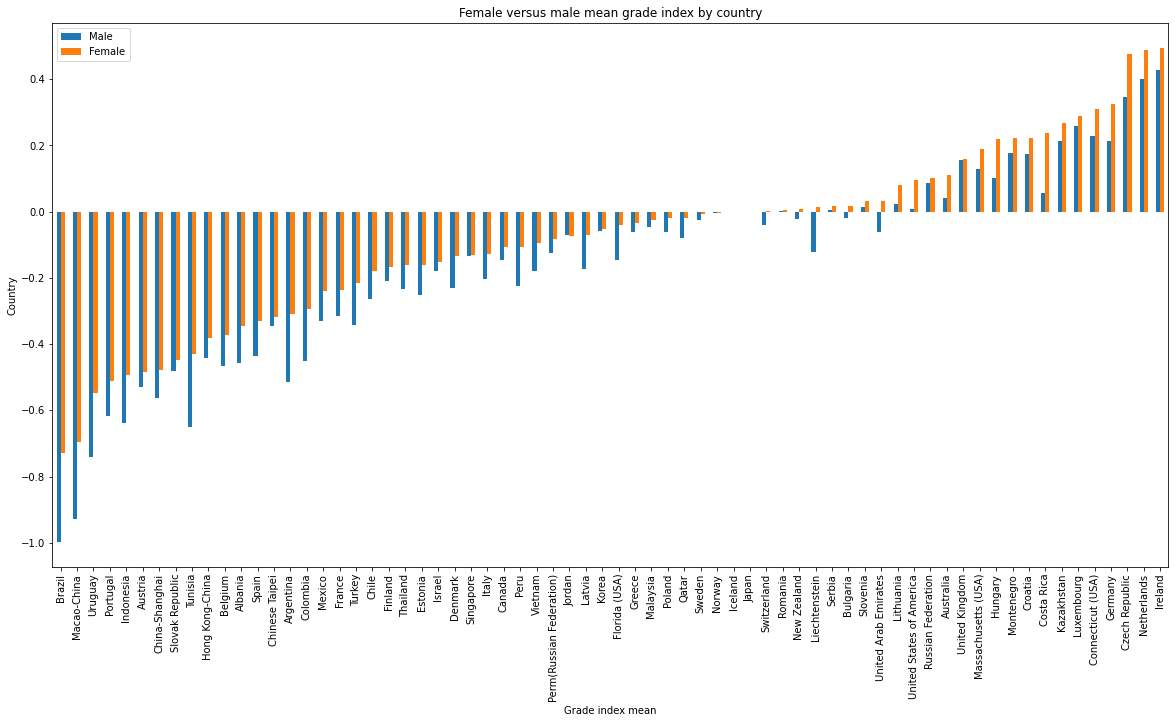

In [24]:
#plotting a clustered bar chart of female versus male mean grade index by country
sorted = data_cntry.sort_values(by=['Female']) #sorting my dataset by females mean grade index per country
g = sorted.plot(kind = 'bar', figsize=(20, 10))
plt.legend()
plt.title("Female versus male mean grade index by country")
plt.ylabel("Country")
plt.xlabel("Grade index mean");

<h1><center>Thanks!</center></h1>

In [28]:
!jupyter nbconvert PISA_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook PISA_slide_deck.ipynb to slides
[NbConvertApp] Writing 729070 bytes to PISA_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\users\youssef\appdata\local\programs\python\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\youssef\appdata\local\programs\python\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Youssef\AppData\Local\Programs\Python\Python39\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "c:\users\youssef\appdata\local\programs\python\python39\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "c:\users\youssef\appdata\local\programs\python\python39\lib\site-packages\traitlets\config\